In [1]:
TRAIN_SIZE = 25
!python Baseline/select_medical.py \
  --preprocessed_data_dir="preprocessed_data/" \
  --output_file="Baseline/selected_train_ids.json" \
  --train_size={TRAIN_SIZE} \
  --random_seed=42 \
  --n_folds=10 \
  --outer_split_size=0.8

--- Medical TF-IDF Nested Cross-Validation Selection Script ---
Loading preprocessed training data for selection...
Full Training data shape: (11550, 10000)
Full training data contains 11550 samples across 5 classes.

--- Starting Medical TF-IDF Nested Cross-Validation Selection Baseline ---
Train set size limit (final selection): 25
Random seed: 42
Nested CV folds: 10
Outer split train proportion: 0.8

Running Nested Cross-Validation:
Outer CV Fold:   0%|                                     | 0/10 [00:03<?, ?it/s]
Traceback (most recent call last):
  File "/drive1/nammt/dataperf-speech-example/Medical-Abstracts-TC-Corpus-new/Baseline/select_medical.py", line 279, in <module>
    fire.Fire(main)
  File "/drive1/nammt/dataperf-speech-example/venv/lib/python3.10/site-packages/fire/core.py", line 135, in Fire
    component_trace = _Fire(component, args, parsed_flag_args, context, name)
  File "/drive1/nammt/dataperf-speech-example/venv/lib/python3.10/site-packages/fire/core.py", line 468,

In [ ]:
!python eval_medical.py --preprocessed_data_dir preprocessed_data/ --selected_ids_json Baseline/selected_train_ids.json --metrics_output_file Baseline/results_selected_subset.json

--- Medical Abstract Evaluation Script ---
Loading preprocessed data...
Full Training data shape: (11550, 10000), Labels shape: (11550,), IDs shape: (11550,)
Test data shape: (2888, 10000), Labels shape: (2888,)

--- Loading Selected Training IDs from selected_train_ids.json ---
Filtered training data using selected subset. Shape: (25, 10000)

--- Training and Evaluating with Multiple Random Seeds ---
Evaluating Seeds: 100%|█████████████████████████| 10/10 [00:06<00:00,  1.61it/s]

--- Evaluation Results ---
Individual F1 Macro Scores: [0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463, 0.09987009612886463]
Average F1 Macro Score: 0.0999
Standard Deviation of F1 Macro Scores: 0.0000
Metrics saved to results_selected_subset.json


In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_ids_path = os.path.join('preprocessed_data', 'train_sample_ids.npy')
train_sample_ids = np.load(train_ids_path)
max_train_size = len(train_sample_ids)

max_train_size

11550

## Training Size Sweep Strategy
The previous approach used only 10 log-spaced points between 10 and 11550, which is too sparse to reliably detect the elbow point in the learning curve. 

To improve this, we:
- Increase the number of log-spaced points (e.g., 20 or 30).
- Add more points at the lower end (e.g., 25, 30, 40, 50, 60, 100, 200, 500) to capture the rapid change in performance.
- Always include the full training set size.

This gives a much denser and more informative curve.

In [20]:
fixed_small_sizes = [25, 60, 100, 200, 500, 1000]



In [ ]:
results = []
for train_size in sizes:
    print(f'Running for train_size={train_size}')
    # Run selection
    !python select_medical.py \
      --preprocessed_data_dir="preprocessed_data/" \
      --output_file="selected_train_ids.json" \
      --train_size={train_size} \
      --random_seed=42 \
      --n_folds=10 \
      --outer_split_size=0.8

    # Run evaluation
    !python eval_medical.py --preprocessed_data_dir preprocessed_data/ --selected_ids_json selected_train_ids.json --metrics_output_file results_selected_subset.json

    with open('results_selected_subset.json', 'r') as f:
        metrics = json.load(f)
    metrics['train_size'] = train_size
    results.append(metrics)

with open('train_size_vs_f1.json', 'w') as f:
    json.dump(results, f, indent=2)

print('Sweep complete. Results saved to train_size_vs_f1.json')

Running for train_size=25
--- Medical TF-IDF Nested Cross-Validation Selection Script ---
Loading preprocessed training data for selection...
--- Medical TF-IDF Nested Cross-Validation Selection Script ---
Loading preprocessed training data for selection...
Preprocessed data loaded. Full Training data shape: (11550, 10000)
Original Sample IDs shape: (11550,)
Full training data contains 11550 samples across 5 classes.

--- Starting Medical TF-IDF Nested Cross-Validation Selection Baseline ---
Train set size limit (final selection): 25
Random seed: 42
Nester CV folds: 10
Outer split train proportion: 0.8

Running Nested Cross-Validation:
Outer CV Fold:   0%|                                     | 0/10 [00:00<?, ?it/s]Preprocessed data loaded. Full Training data shape: (11550, 10000)
Original Sample IDs shape: (11550,)
Full training data contains 11550 samples across 5 classes.

--- Starting Medical TF-IDF Nested Cross-Validation Selection Baseline ---
Train set size limit (final selection

KeyboardInterrupt: 

### ALL OF TRAIN SET



In [ ]:
import numpy as np
import json

all_ids = np.load('preprocessed_data/train_sample_ids.npy')


with open('selected_train_ids.json', 'w') as f:
    json.dump({"selected_ids": all_ids.tolist()}, f)
print(f"Saved all {len(all_ids)} training IDs to selected_train_ids.json")

Saved all 11550 training IDs to selected_train_ids.json


In [5]:
!python eval_medical.py --use_full_training=True

--- Medical Abstract Evaluation Script ---
Loading preprocessed data...
Preprocessed data loaded.
Full Training data shape: (11550, 10000), Labels shape: (11550,), IDs shape: (11550,)
Test data shape: (2888, 10000), Labels shape: (2888,)

--- Using Full Training Data (--use_full_training flag set) ---

--- Training and Evaluating Once on Full Training Set ---
Single Run F1 Macro Score: 0.5087

--- Evaluation Results ---
Individual F1 Macro Scores: [0.5087079089476615]
Average F1 Macro Score: 0.5087
Standard Deviation of F1 Macro Scores: 0.0000
Metrics saved to metrics.json


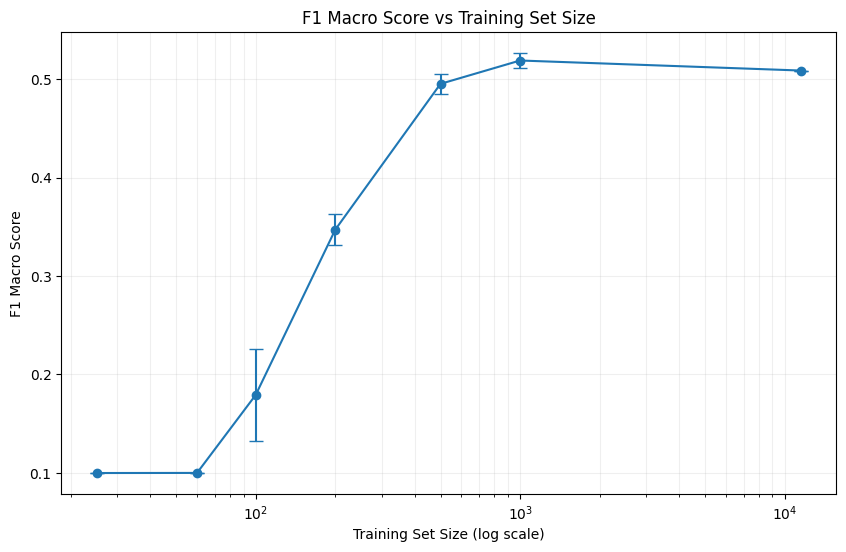

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_sizes = [25, 60, 100, 200, 500, 1000, 11550]
f1_scores = [0.0999, 0.1000, 0.1792, 0.3471, 0.4952, 0.5189, 0.5087]
std_devs = [0.0000, 0.0002, 0.0467, 0.0155, 0.0099, 0.0075, 0.0000]

plt.figure(figsize=(10, 6))
plt.errorbar(train_sizes, f1_scores, yerr=std_devs, fmt='o-', capsize=5)

plt.xscale('log')

plt.xlabel('Training Set Size (log scale)')
plt.ylabel('F1 Macro Score')
plt.title('F1 Macro Score vs Training Set Size')

plt.grid(True, which="both", ls="-", alpha=0.2)

plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt

with open('train_size_vs_f1.json', 'r') as f:
    results = json.load(f)

train_sizes = [r['train_size'] for r in results]
f1_scores = [r['average_f1_macro'] for r in results]

plt.figure(figsize=(8,5))
plt.plot(train_sizes, f1_scores, marker='o')
plt.xscale('log')
plt.xlabel('Training Set Size (log scale)')
plt.ylabel('Average F1 Macro')
plt.title('F1 Macro vs. Training Set Size')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [3]:
TRAIN_SIZE = 25 
!python Cleanlab/select_cleanlab_medical.py \
  --preprocessed_data_dir="preprocessed_data/" \
  --output_file="Cleanlab/selected_train_ids_cleanlab.json" \
  --train_size={TRAIN_SIZE} \
  --random_seed=42 \
  --n_folds=3 \
  --class_balance="equal" \
  --extra_frac=0.5

Loading preprocessed data from preprocessed_data/...
Data loaded in 0.11 seconds. Shape: (11550, 10000)

Selecting 25 samples using cleanlab with 3 folds...
Number of classes: 5
Class distribution target (0-indexed labels):
  Class 1: 5 samples (0-indexed: 0)
  Class 2: 5 samples (0-indexed: 1)
  Class 3: 5 samples (0-indexed: 2)
  Class 4: 5 samples (0-indexed: 3)
  Class 5: 5 samples (0-indexed: 4)
Using cleanlab + K-medoids clustering to select data subset ...
Finding label issues using Cleanlab with 3 folds...
Computing out of sample predicted probabilities via 3-fold cross validation. May take a while ...
Using predicted probabilities to identify label issues ...
Identified 3873 examples with label issues.
Cleanlab find_label_issues completed in 1.93 seconds.
Class distribution after cleanlab filtering: 
[[   1 1321]
 [   2  492]
 [   3  680]
 [   4 1262]
 [   5 1936]]
Keeping 5691 samples after filtering label issues and low quality scores.
Finding coresets among remaining clean 

In [4]:
!python eval_medical.py --preprocessed_data_dir preprocessed_data/ --selected_ids_json Cleanlab/selected_train_ids_cleanlab.json --metrics_output_file Cleanlab/results_selected_subset.json

--- Medical Abstract Evaluation Script ---
Full Training data shape: (11550, 10000), Labels shape: (11550,), IDs shape: (11550,)
Test data shape: (2888, 10000), Labels shape: (2888,)

--- Loading Selected Training IDs from Cleanlab/selected_train_ids_cleanlab.json ---
Filtered training data using selected subset. Shape: (25, 10000)

--- Training and Evaluating with Multiple Random Seeds ---
Evaluating Seeds: 100%|█████████████████████████| 10/10 [00:03<00:00,  2.83it/s]

--- Evaluation Results ---
Individual F1 Macro Scores: [0.10339098985388376, 0.10705273374591903, 0.2042563463842797, 0.12165282246390108, 0.06140784008937896, 0.3304762547697268, 0.3237566105631549, 0.08002313400531272, 0.13498161009626614, 0.10190286484269728]
Average F1 Macro Score: 0.1569
Standard Deviation of F1 Macro Scores: 0.0924
Metrics saved to Cleanlab/results_selected_subset.json


In [22]:
import json
import numpy as np

log_file = f'cleanlab_sweep_results.txt'

results = []
with open(log_file, 'w') as f:
    f.write("=" * 80 + "\n\n")
    
    for train_size in fixed_small_sizes:
        f.write("=" * 80 + "\n")
        
        # Run cleanlab selection
        !python select_cleanlab_medical.py \
          --preprocessed_data_dir="preprocessed_data/" \
          --output_file="selected_train_ids_cleanlab.json" \
          --train_size={train_size} \
          --random_seed=42 \
          --n_folds=3 \
          --class_balance="equal" \
          --extra_frac=0.5
    
        with open('selected_train_ids_cleanlab.json', 'r') as rf:
            selected_data = json.load(rf)
            selected_ids = np.array(selected_data['selected_ids'])
            
        # Get label counts
        labels = np.load('preprocessed_data/y_train_full.npy')[selected_ids]
        unique, counts = np.unique(labels, return_counts=True)
        
        # Write class distribution
        f.write(f"\nSelected training set created with {train_size} samples.\n")
        for label, count in zip(unique, counts):
            f.write(f"  Label {label}: {count} samples\n")
        
        # Run evaluation
        !python eval_medical.py \
          --preprocessed_data_dir preprocessed_data/ \
          --selected_ids_json selected_train_ids_cleanlab.json \
          --metrics_output_file results_selected_subset.json
        
        # Store and log evaluation results
        with open('results_selected_subset.json', 'r') as rf:
            metrics = json.load(rf)
        
        f.write("--- Evaluation Results ---\n")
        # Safely access metrics with fallback values
        f.write(f"Individual F1 Macro Scores: {metrics.get('f1_macro_scores', metrics.get('individual_f1_scores', []))}\n")
        f.write(f"Average F1 Macro Score: {metrics.get('average_f1_macro', metrics.get('f1_macro_mean', 0.0)):.4f}\n")
        f.write(f"Standard Deviation of F1 Macro Scores: {metrics.get('std_f1_macro', metrics.get('f1_macro_std', 0.0)):.4f}\n")
        
        # Add blank lines for readability
        f.write("\n\n")
        f.flush()  # Force write to disk

print(f'\nSweep complete! Detailed log saved to {log_file}')

Loading preprocessed data from preprocessed_data/...
Data loaded in 0.10 seconds. Shape: (11550, 10000)

Selecting 25 samples using cleanlab with 3 folds...
Number of classes: 5
Class distribution target (0-indexed labels):
  Class 1: 5 samples (0-indexed: 0)
  Class 2: 5 samples (0-indexed: 1)
  Class 3: 5 samples (0-indexed: 2)
  Class 4: 5 samples (0-indexed: 3)
  Class 5: 5 samples (0-indexed: 4)
Using cleanlab + K-medoids clustering to select data subset ...
Finding label issues using Cleanlab with 3 folds...
Computing out of sample predicted probabilities via 3-fold cross validation. May take a while ...
Using predicted probabilities to identify label issues ...
Identified 3873 examples with label issues.
Cleanlab find_label_issues completed in 1.83 seconds.
Class distribution after cleanlab filtering: 
[[   1 1321]
 [   2  492]
 [   3  680]
 [   4 1262]
 [   5 1936]]
Keeping 5691 samples after filtering label issues and low quality scores.
Finding coresets among remaining clean 

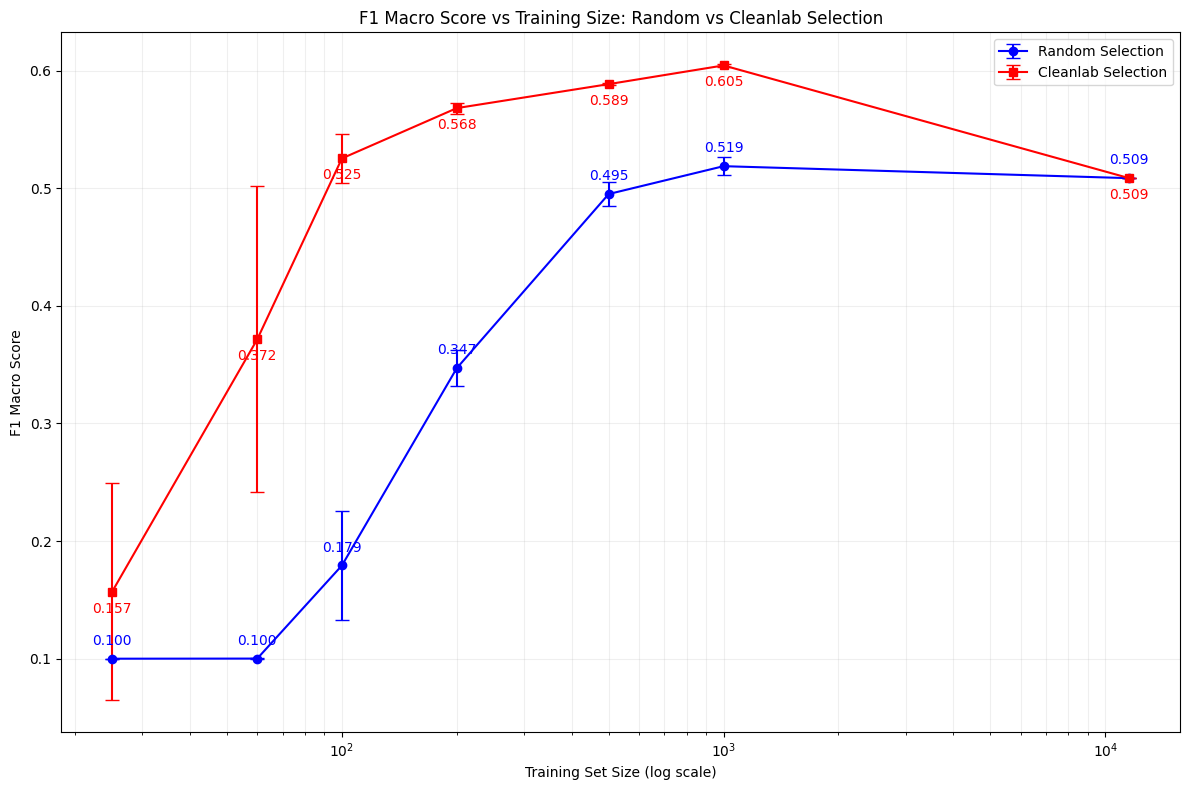

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
train_sizes_orig = [25, 60, 100, 200, 500, 1000, 11550]
f1_scores_orig = [0.0999, 0.1000, 0.1792, 0.3471, 0.4952, 0.5189, 0.5087]
std_devs_orig = [0.0000, 0.0002, 0.0467, 0.0155, 0.0099, 0.0075, 0.0000]

# Cleanlab data (including full dataset)
train_sizes_cleanlab = [25, 60, 100, 200, 500, 1000, 11550]
f1_scores_cleanlab = [0.1569, 0.3716, 0.5255, 0.5683, 0.5887, 0.6046, 0.5087]
std_devs_cleanlab = [0.0924, 0.1302, 0.0210, 0.0046, 0.0010, 0.0011, 0.0000]

plt.figure(figsize=(12, 8))

# Plot original data
plt.errorbar(train_sizes_orig, f1_scores_orig, yerr=std_devs_orig, 
             fmt='o-', capsize=5, label='Random Selection', color='blue')

# Plot cleanlab data
plt.errorbar(train_sizes_cleanlab, f1_scores_cleanlab, yerr=std_devs_cleanlab, 
             fmt='s-', capsize=5, label='Cleanlab Selection', color='red')

plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.xlabel('Training Set Size (log scale)')
plt.ylabel('F1 Macro Score')
plt.title('F1 Macro Score vs Training Size: Random vs Cleanlab Selection')
plt.legend()

# Add value labels for both curves
for x, y in zip(train_sizes_orig, f1_scores_orig):
    plt.annotate(f'{y:.3f}', (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', color='blue')
for x, y in zip(train_sizes_cleanlab, f1_scores_cleanlab):
    plt.annotate(f'{y:.3f}', (x, y), textcoords="offset points", 
                xytext=(0,-15), ha='center', color='red')

plt.tight_layout()
plt.show()